In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab


import geopandas 

In [166]:
boundary = geopandas.read_file('final_com_boundaries.geojson')

In [167]:
com = pd.read_csv('Final_com_rate.csv')

In [168]:
boundary.head()

community area     shape_area perimeter area_num_1 area_numbe  \
0          DOUGLAS    0  46004621.1581         0         35         35   
1          OAKLAND    0  16913961.0408         0         36         36   
2      FULLER PARK    0  19916704.8692         0         37         37   
3  GRAND BOULEVARD    0  48492503.1554         0         38         38   
4          KENWOOD    0  29071741.9283         0         39         39   

  comarea_id comarea      shape_len  \
0          0       0  31027.0545098   
1          0       0  19565.5061533   
2          0       0  25339.0897503   
3          0       0  28196.8371573   
4          0       0  23325.1679062   

                                            geometry  
0  (POLYGON ((-87.60914087617894 41.8446925026539...  
1  (POLYGON ((-87.59215283879394 41.8169293462668...  
2  (POLYGON ((-87.62879823733725 41.8018930336891...  
3  (POLYGON ((-87.6067081256125 41.81681377057218...  
4  (POLYGON ((-87.59215283879394 41.8169293462668...

In [169]:
com.rename(columns={'Community Area Name':'community'},inplace=True)

In [170]:
com['community'] = com['community'].str.upper() 

In [171]:
boundary = pd.merge(boundary, com, on="community", how="inner")

In [183]:
socio = pd.read_excel('MasterSet_wCrime.xlsx')

In [184]:
socio['Community Area Name']= socio['Community Area Name'].str.upper()
socio.rename(columns={"Community Area Name": "community"}, inplace=True)

In [185]:
socio.head()

community  TOT_POP  MED_AGE  UND19  A20_34  A35_49  WHITE   HISP  \
0     ALBANY PARK    51575     33.6  13354   13738   11975  14932  24892   
1  ARCHER HEIGHTS    13233     33.0   4016    2933    2879   2477  10178   
2   ARMOUR SQUARE    13699     42.0   2997    2824    2539   1599    423   
3         ASHBURN    43283     35.5  12983    8368    8998   5044  16374   
4  AUBURN GRESHAM    45770     39.6  11432    9224    7941    257    614   

   BLACK  ASIAN    ...     CRIM SEXUAL ASSAULT  PUBLIC PEACE VIOLATION  \
0   2337   7883    ...                      86                     132   
1     79    439    ...                      30                      67   
2   1248  10299    ...                      25                      44   
3  20721    314    ...                      80                     144   
4  44267    153    ...                     295                     448   

   OFFENSE INVOLVING CHILDREN  INTERFERENCE WITH PUBLIC OFFICER  OBSCENITY  \
0                         154                                34          2   
1                          66                                10          3   
2                          29                                18          1   
3                         171                                21         13   
4                         520                               360          3   

   STALKING  KIDNAPPING  ARSON  INTIMIDATION  GAMBLING  
0         6          15     32            15         5  
1         4          16     13             6         1  
2         5           1      4             8         5  
3        14          24     35            10        14  
4        36          43     89            17        50  

[5 rows x 71 columns]

In [186]:
boundary = pd.merge(boundary, socio, on="community", how="inner") 

In [187]:
type(boundary)
type(boundary.geometry)
type(boundary.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Text(0.5,1,'Arrest Rates by Community Area')

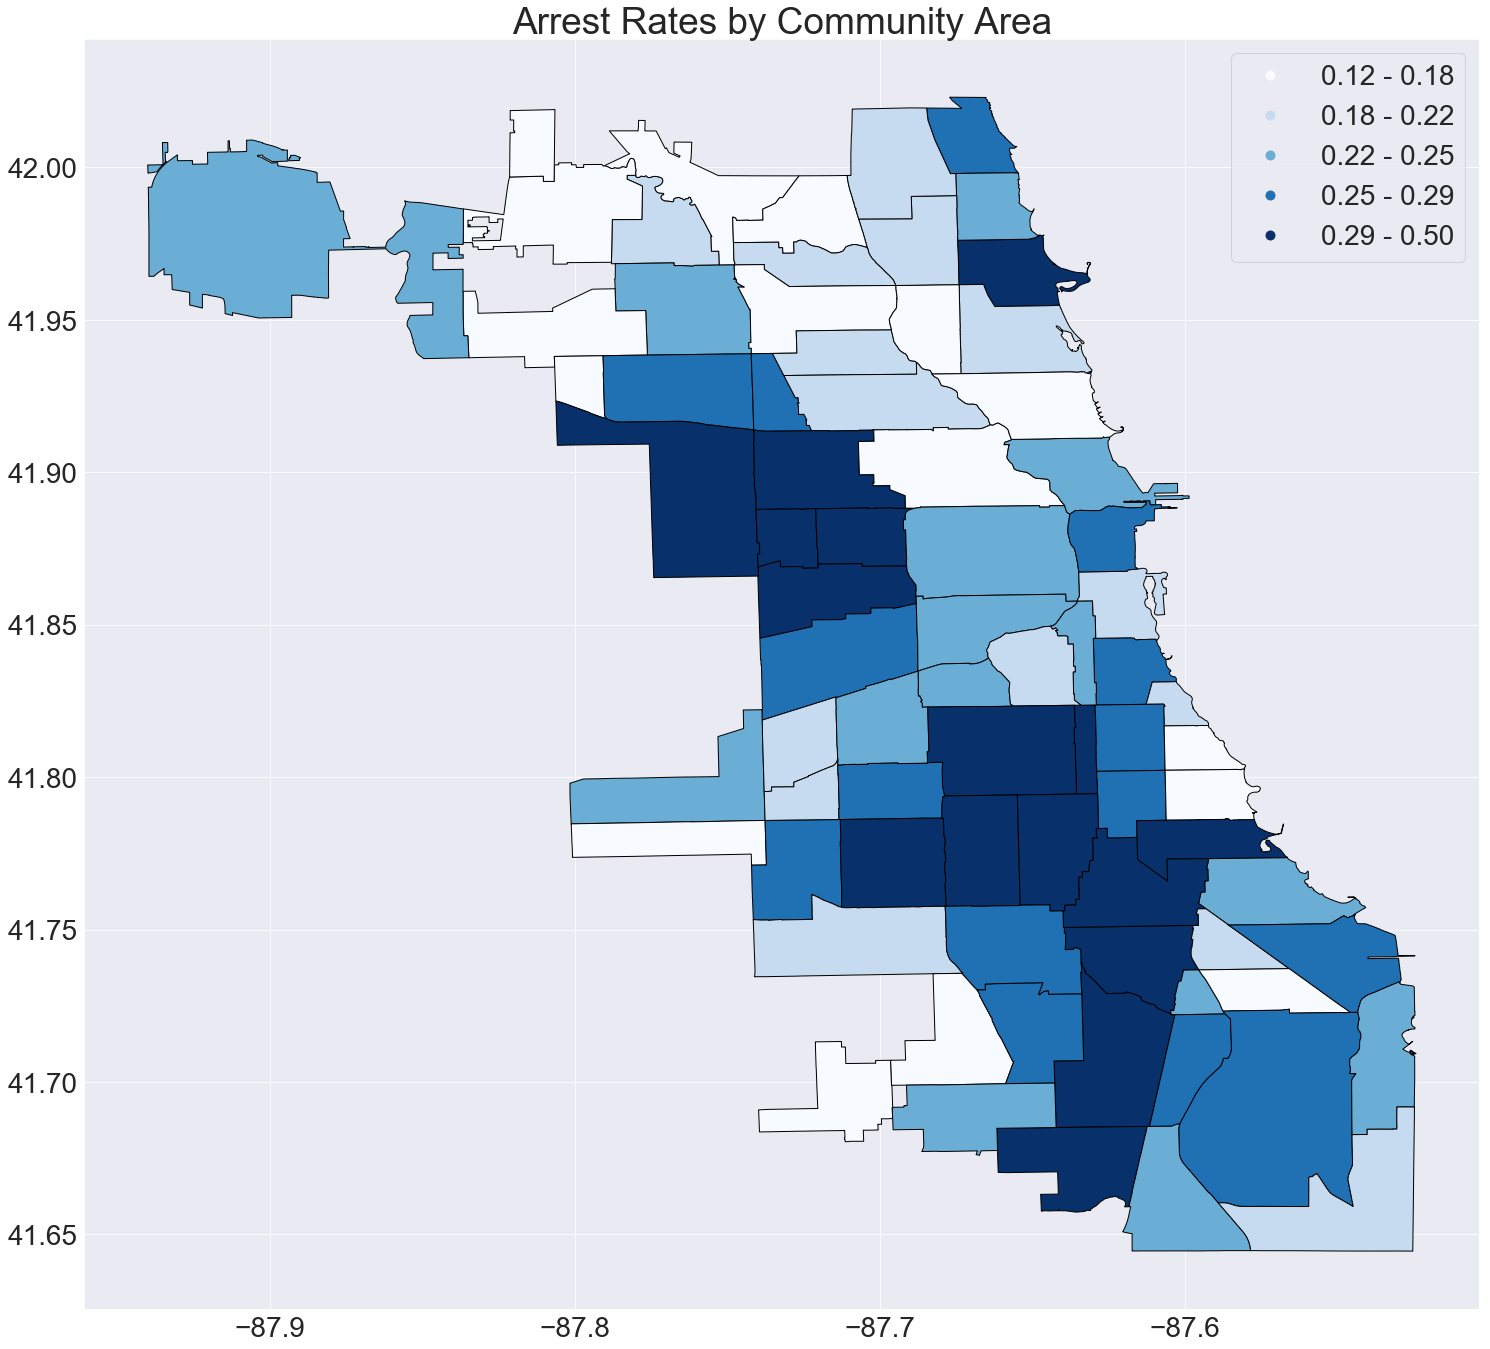

In [188]:
axes=boundary.plot(column='rate',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Arrest Rates by Community Area",fontsize=37)
#plt.savefig("FINAL_com_rate.csv")

In [192]:
axes=boundary.plot(column='PER CAPITA INCOME _x',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("PCI by Community Area",fontsize=37)
#plt.savefig("FINAL_com_pci.png")

Text(0.5,1,'PCI by Community Area')

In [325]:
pci = pd.read_csv('FINAL_pci.csv')
pci.rename({"PER CAPITA INCOME ": "pci"}, axis = 'columns', inplace=True )

In [326]:
fig,ax=plt.subplots(figsize=(15,15))
sns.set_style("darkgrid")
ax = sns.scatterplot(x="rate", y="pci", s=100 ,data=pci)
ax.grid(True,axis='both',linewidth=2)
ax.set_xlabel('Arrest Rate',fontsize=30)
ax.set_ylabel('Per Capita Income',fontsize=30)
#plt.savefig("FINAL_pci_rate_scatter.png")

Text(0,0.5,'Per Capita Income')

In [327]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [328]:
pci['rate']=pci['rate']*100
pci.head()

Unnamed: 0    pci   Arrest     ID       rate
0           0   8201   1254.0   5003  25.064961
1           1  10402   4974.0  17468  28.474926
2           2  10432   1281.0   3606  35.524126
3           3  10934  11070.0  22270  49.708128
4           4  11317   9609.0  29928  32.107057

In [329]:
pci['pci']=pci['pci']/1000

In [330]:
pci.head()

Unnamed: 0     pci   Arrest     ID       rate
0           0   8.201   1254.0   5003  25.064961
1           1  10.402   4974.0  17468  28.474926
2           2  10.432   1281.0   3606  35.524126
3           3  10.934  11070.0  22270  49.708128
4           4  11.317   9609.0  29928  32.107057

In [342]:
pci_rate=smf.ols('rate ~ pci + np.power(pci,2)',pci).fit()
pci_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     29.37
Date:                Thu, 09 May 2019   Prob (F-statistic):           4.08e-10
Time:                        19:03:18   Log-Likelihood:                -240.08
No. Observations:                  77   AIC:                             486.2
Df Residuals:                      74   BIC:                             493.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           41.2011      2.418     17.042      0.000      36.384      46.018
pci                 -0.9960      0.150     -6.653      0.000      -1.294      -0.698
np.power(pci, 2)     0.0096      0.002      5.325      0.000       0.006       0.013
==============================================================================
Omnibus:                       15.257   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.191
Skew:                           1.026   Prob(JB):                     0.000185
Kurtosis:                       4.070   Cond. No.                     5.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
types = pd.read_csv('FINAL_type_rate.csv')

In [196]:
types.head()

Unnamed: 0       Primary Type  Incidents and Arrests      ID      rate
0           2          NARCOTICS               108823.0  109714  0.991879
1           9            BATTERY                44593.0  187643  0.237648
2          14              THEFT                26930.0  234716  0.114734
3           6  CRIMINAL TRESPASS                20174.0   27458  0.734722
4           8            ASSAULT                15943.0   63675  0.250381

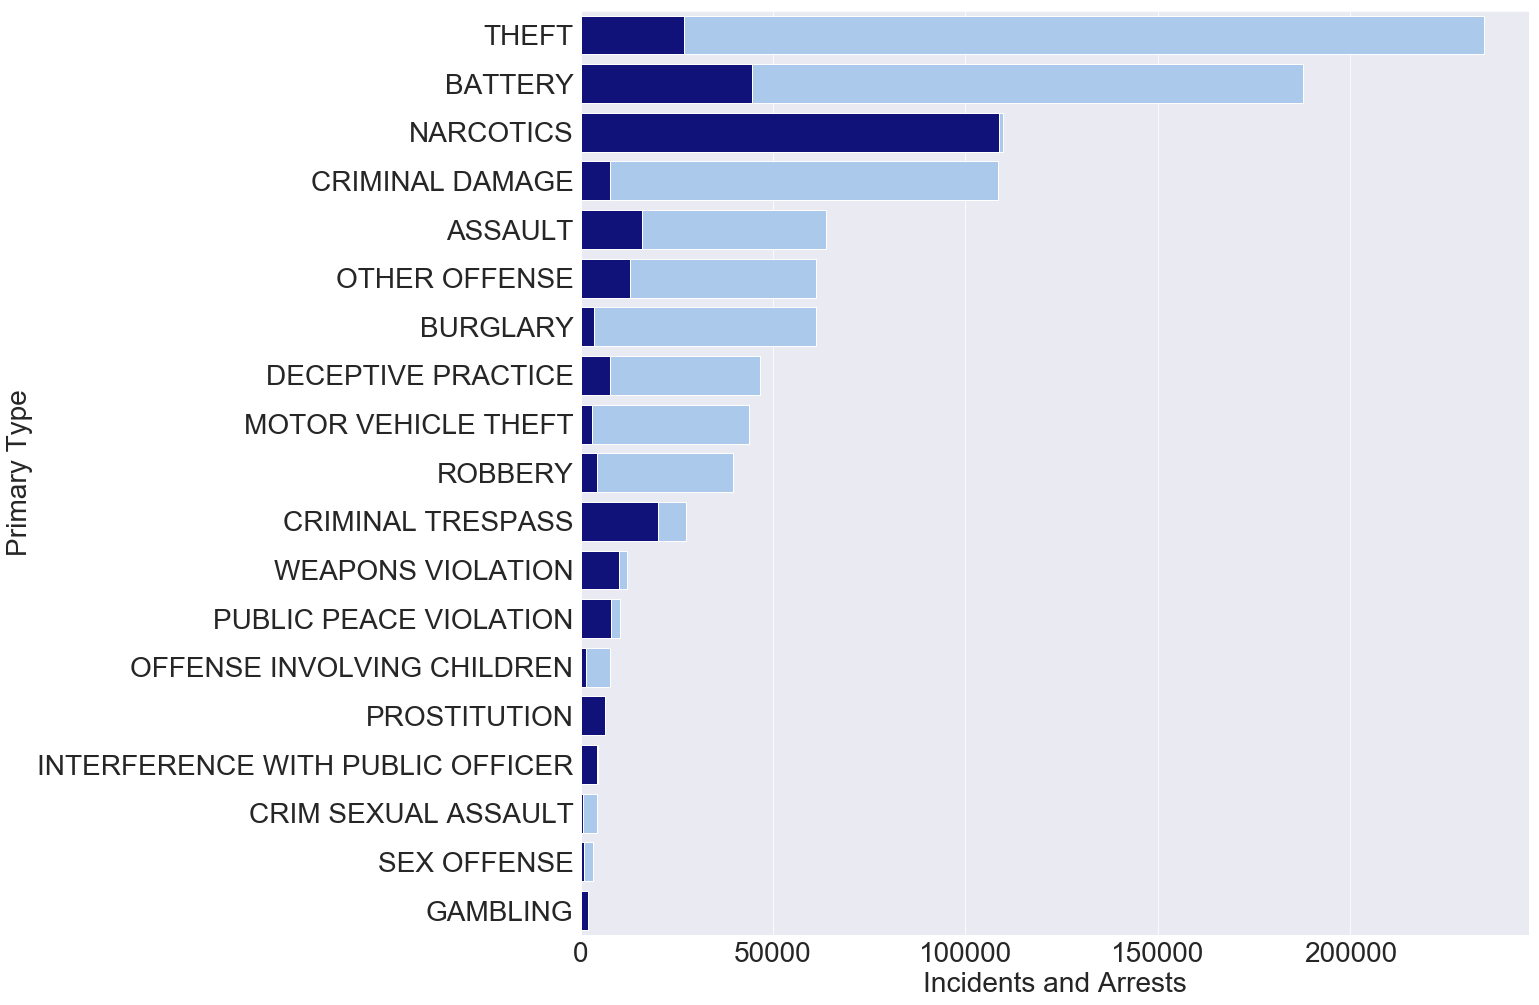

In [197]:
# Initialize the matplotlib figure
f, axes = plt.subplots(figsize=(17, 17))

# Load the example car crash dataset
types = types.sort_values("ID", ascending=False)


# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="ID", y="Primary Type", data=types,
            color="b")
sns.barplot(x="Incidents and Arrests", y="Primary Type", data=types,
            color="darkblue")

plt.rcParams.update({'font.size': 28})
#plt.savefig("FINAL_type_count.png")

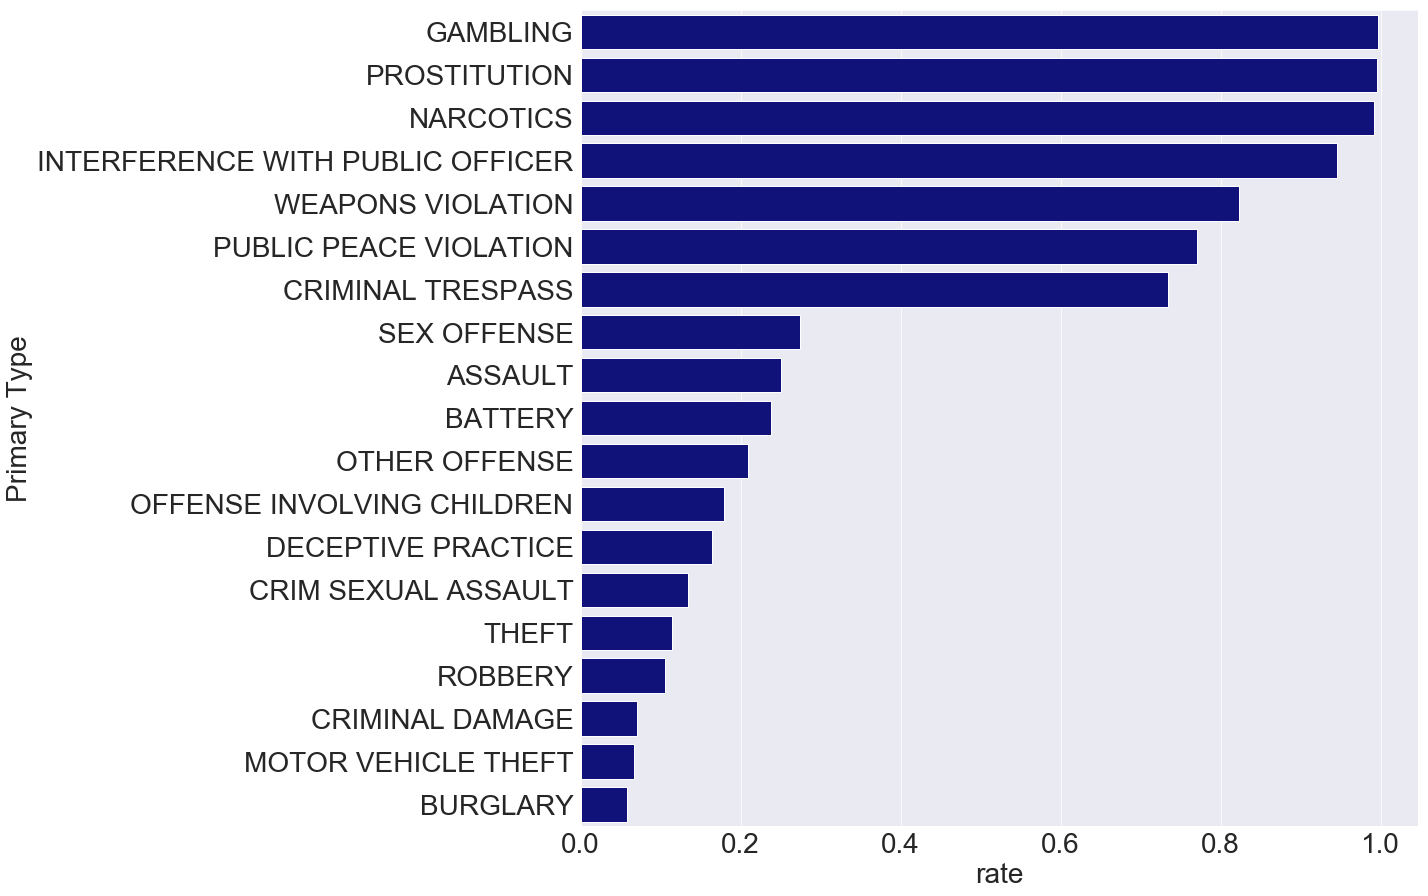

In [198]:
# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1,figsize=(15, 15))

# Load the example car crash dataset
types = types.sort_values("rate", ascending=False)

sns.barplot(x="rate", y="Primary Type", data=types, color="darkblue")
plt.rcParams.update({'font.size': 28})
#plt.savefig("FINAL_com_rate.png")

In [205]:
list(boundary.columns)

[u'community',
 u'area',
 u'shape_area',
 u'perimeter',
 u'area_num_1',
 u'area_numbe',
 u'comarea_id',
 u'comarea',
 u'shape_len',
 'geometry',
 'Arrest',
 'ID',
 'rate',
 u'Community Number',
 'TOT_POP_x',
 'MED_AGE_x',
 'UND19_x',
 'A20_34_x',
 'A35_49_x',
 'WHITE_x',
 'HISP_x',
 'BLACK_x',
 'ASIAN_x',
 'OTHER_x',
 'POP_16OV_x',
 'IN_LBFRC_x',
 'EMP_x',
 'UNEMP_x',
 'NOT_IN_LBFRC_x',
 'POP_25OV_x',
 'LT_HS_x',
 'HS_x',
 'SOME_COLL_x',
 'ASSOC_x',
 'BACH_x',
 'GRAD_PROF_x',
 'INC_LT_25K_x',
 'INC_25_50K_x',
 'INC_50_75K_x',
 'INC_75_100K_x',
 'INC_100_150K_x',
 'INC_GT_150_x',
 'MEDINC_x',
 'TOT_HH_x',
 'VAC_HU_x',
 'FAM_HH_x',
 'SP_WCHILD_HH_x',
 'NONFAM_HH_x',
 'Per_HH_Crowded_x',
 'Per_HH_BelowPov_x',
 'PER CAPITA INCOME _x',
 'HARDSHIP_INDEX_x',
 'Birth Rate_x',
 'General Fertility Rate_x',
 'Teen Birth Rate_x',
 'Preterm Births_x',
 'Infant Mortality Rate_x',
 'Mort_homicide_x',
 'Mort_diabetes_x',
 'Mort_Firearm_x',
 'Life_Exp_10_x',
 'TOT_POP_y',
 'MED_AGE_y',
 'UND19_y',
 'A2

In [238]:
boundary['highest']=boundary['GAMBLING']+boundary['PROSTITUTION']+boundary['NARCOTICS']+boundary['INTERFERENCE WITH PUBLIC OFFICER']+boundary['WEAPONS VIOLATION']
boundary['lowest']=boundary['BURGLARY']+boundary['MOTOR VEHICLE THEFT']+boundary['CRIMINAL DAMAGE']+boundary['ROBBERY']+boundary['THEFT']

In [239]:
total=boundary[[\
 u'community'\
 u'BATTERY',\
 u'HOMICIDE',\
 u'THEFT',\
 u'ROBBERY',\
 u'BURGLARY',\
 u'MOTOR VEHICLE THEFT',\
 u'NARCOTICS',\
 u'CRIMINAL TRESPASS',\
 u'WEAPONS VIOLATION',\
 u'CRIMINAL DAMAGE',\
 u'PROSTITUTION',\
 u'SEX OFFENSE',\
 u'CRIM SEXUAL ASSAULT',\
 u'PUBLIC PEACE VIOLATION',\
 u'OFFENSE INVOLVING CHILDREN',\
 u'INTERFERENCE WITH PUBLIC OFFICER',\
 u'OBSCENITY',\
 u'STALKING',\
 u'KIDNAPPING',\
 u'ARSON',\
 u'INTIMIDATION',\
 u'GAMBLING']]

In [240]:
total['total']=total.sum(axis = 1, skipna = True) 

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
boundary['total']=total['total']

In [242]:
boundary['hi_per']=boundary['highest']/boundary['total']
boundary['lo_per']=boundary['lowest']/boundary['total']

In [243]:
boundary[['hi_per','lo_per']]

hi_per    lo_per
0   0.072861  0.579547
1   0.124267  0.603400
2   0.143070  0.543369
3   0.121506  0.551579
4   0.055449  0.661906
5   0.051773  0.683390
6   0.114918  0.524374
7   0.018678  0.775971
8   0.141203  0.509210
9   0.091216  0.582545
10  0.060629  0.667990
11  0.028666  0.775450
12  0.049918  0.733041
13  0.066190  0.648202
14  0.074114  0.657523
15  0.050217  0.686116
16  0.054914  0.655442
17  0.044118  0.666378
18  0.100772  0.594024
19  0.063856  0.656700
20  0.105600  0.591967
21  0.045837  0.702551
22  0.044779  0.730695
23  0.299669  0.415847
24  0.036770  0.767283
25  0.261927  0.427788
26  0.391240  0.340591
27  0.293600  0.387608
28  0.052273  0.703494
29  0.291508  0.386732
..       ...       ...
47  0.032185  0.795178
48  0.084614  0.571225
49  0.097403  0.577950
50  0.110733  0.554321
51  0.156120  0.516021
52  0.098735  0.438307
53  0.068656  0.592121
54  0.119287  0.645668
55  0.071562  0.698075
56  0.125413  0.564260
57  0.056167  0.684395
58  0.160699  0.508453
59  0.061660  0.719518
60  0.109730  0.595233
61  0.055687  0.656564
62  0.047764  0.738822
63  0.138744  0.537483
64  0.186721  0.464889
65  0.171957  0.457054
66  0.126755  0.509240
67  0.016665  0.836740
68  0.061690  0.673568
69  0.147319  0.510238
70  0.033404  0.744097
71  0.113281  0.579532
72  0.031707  0.654647
73  0.094582  0.604786
74  0.053119  0.596295
75  0.044236  0.672778
76  0.020685  0.635521

[77 rows x 2 columns]

Text(0.5,1,'Highest Category Percentage')

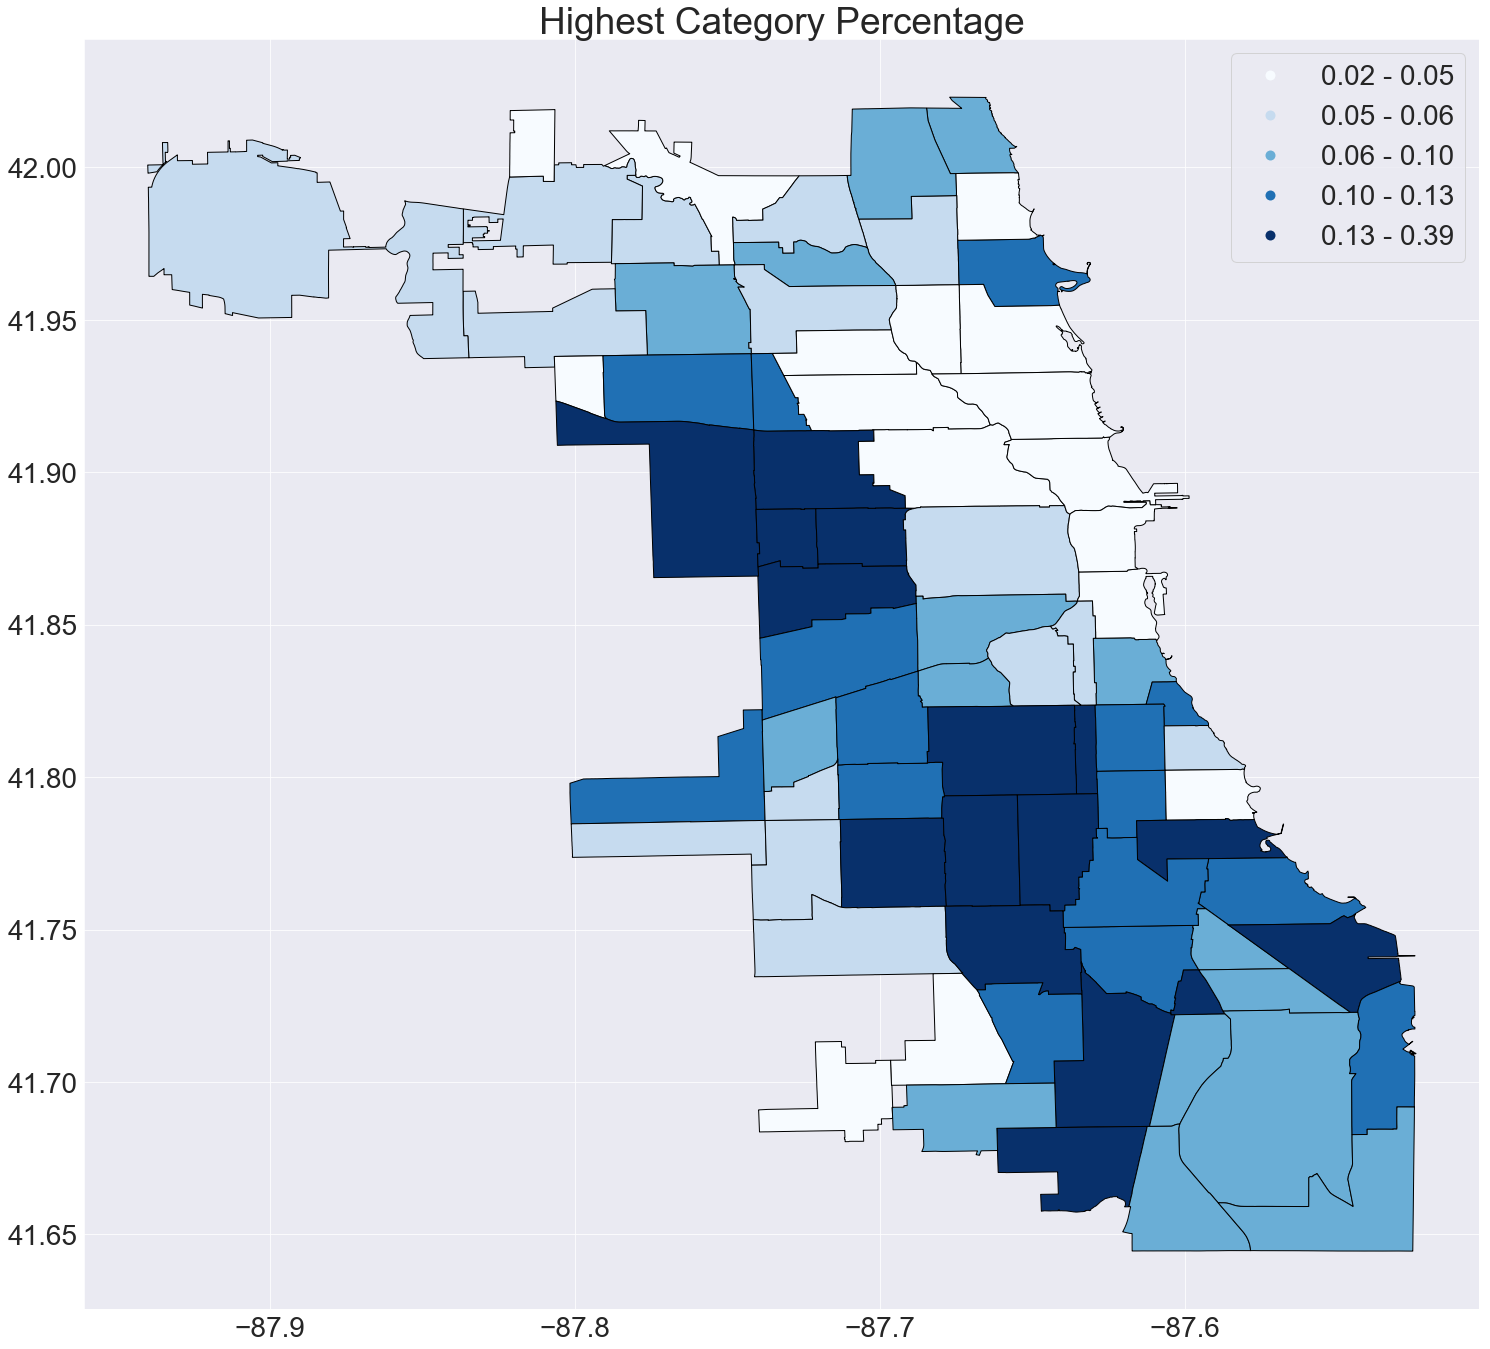

In [535]:
axes=boundary.plot(column='hi_per',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Highest Category Percentage",fontsize=37)

In [245]:
axes=boundary.plot(column='lo_per',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Lowest Category Percentage",fontsize=37)

Text(0.5,1,'Lowest Category Percentage')

In [ ]:
boundary.rename(columns={"PER CAPITA INCOME _y": "pci"},inplace=True)

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(30,15))


ax[0]=bound.plot.scatter(x='hi_per', y='PER CAPITA INCOME _y', s=100,c='darkred', ax=ax[0])
ax[1]=bound.plot.scatter(x='lo_per', y='PER CAPITA INCOME _y', s=100,c='darkblue', ax=ax[1])

ax[0].set_xlabel('Percentage of High-Arrest Crimes')
ax[1].set_xlabel('Percentage of Low-Arrest Crimes')

ax[0].set_ylabel('Per Capita Income')
ax[1].set_ylabel('Per Capita Income')

In [ ]:
bound = pd.DataFrame(boundary)

In [ ]:
hilo_pci=smf.ols('pci ~  lo_per + np.power(lo_per,2)',boundary).fit()
hilo_pci.summary()

In [573]:
loc = pd.read_csv('FINAL_loc_rate.csv')

In [574]:
loc = loc.sort_values('ID',ascending=False)
print(loc['ID'].sum())
print(loc['Location Description'].nunique())

1034041
101


In [575]:
loc=pd.DataFrame(loc)

In [576]:
loc.sort_values('ID',ascending=False).head()

Location Description   Arrest      ID      rate
92               STREET  64233.0  235302  0.272981
79            RESIDENCE  21604.0  162622  0.132848
17            APARTMENT  23156.0  130471  0.177480
89             SIDEWALK  61901.0  120888  0.512052
71                OTHER   6089.0   38114  0.159758

In [577]:
loc.reset_index(inplace=True)
loc=loc.loc[0:35,:]

In [582]:
list(loc['Location Description'])

['STREET',
 'RESIDENCE',
 'APARTMENT',
 'SIDEWALK',
 'OTHER',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'SCHOOL, PUBLIC, BUILDING',
 'SMALL RETAIL STORE',
 'RESIDENCE PORCH/HALLWAY',
 'RESIDENCE-GARAGE',
 'VEHICLE NON-COMMERCIAL',
 'RESTAURANT',
 'DEPARTMENT STORE',
 'GROCERY FOOD STORE',
 'GAS STATION',
 'PARK PROPERTY',
 'BAR OR TAVERN',
 'CTA PLATFORM',
 'COMMERCIAL / BUSINESS OFFICE',
 'CTA TRAIN',
 'VACANT LOT/LAND',
 'SCHOOL, PUBLIC, GROUNDS',
 'CTA BUS',
 'HOTEL/MOTEL',
 'CONVENIENCE STORE',
 'BANK',
 'DRUG STORE',
 'HOSPITAL BUILDING/GROUNDS',
 'CHA PARKING LOT/GROUNDS',
 'POLICE FACILITY/VEH PARKING LOT',
 'CHA APARTMENT',
 'ABANDONED BUILDING',
 'CTA GARAGE / OTHER PROPERTY',
 'CTA BUS STOP']

In [585]:
loc.sort_values('rate',inplace=True,ascending=False)

In [586]:
loc

index             Location Description   Arrest      ID      rate
31     77  POLICE FACILITY/VEH PARKING LOT   2081.0    2937  0.708546
19     44                     CTA PLATFORM   3887.0    6181  0.628863
30     31          CHA PARKING LOT/GROUNDS   1924.0    3176  0.605793
14     51                 DEPARTMENT STORE   8513.0   14375  0.592209
15     60               GROCERY FOOD STORE   6251.0   11321  0.552160
34     43      CTA GARAGE / OTHER PROPERTY   1479.0    2735  0.540768
33      0               ABANDONED BUILDING   1523.0    2912  0.523008
3      89                         SIDEWALK  61901.0  120888  0.512052
6      15                            ALLEY  11821.0   23087  0.512020
28     53                       DRUG STORE   1811.0    3681  0.491986
16     58                      GAS STATION   4528.0   10599  0.427210
26     39                CONVENIENCE STORE   1794.0    4296  0.417598
17     74                    PARK PROPERTY   3433.0    8690  0.395052
12     98           VEHICLE NON-COMMERCIAL   6454.0   17359  0.371796
22     95                  VACANT LOT/LAND   1709.0    5031  0.339694
8      87         SCHOOL, PUBLIC, BUILDING   6580.0   20829  0.315906
9      90               SMALL RETAIL STORE   5988.0   19818  0.302150
10     80          RESIDENCE PORCH/HALLWAY   5459.0   18132  0.301070
25     63                      HOTEL/MOTEL   1316.0    4452  0.295597
35     42                     CTA BUS STOP    788.0    2715  0.290239
23     88          SCHOOL, PUBLIC, GROUNDS   1387.0    4813  0.288178
0      92                           STREET  64233.0  235302  0.272981
32     29                    CHA APARTMENT    749.0    2916  0.256859
5      75   PARKING LOT/GARAGE(NON.RESID.)   7521.0   29496  0.254984
7      82    RESIDENTIAL YARD (FRONT/BACK)   5434.0   21866  0.248514
29     62        HOSPITAL BUILDING/GROUNDS    793.0    3272  0.242359
13     83                       RESTAURANT   3780.0   17168  0.220177
18     22                    BAR OR TAVERN   1260.0    6795  0.185430
2      17                        APARTMENT  23156.0  130471  0.177480
24     41                          CTA BUS    844.0    4762  0.177236
4      71                            OTHER   6089.0   38114  0.159758
21     47                        CTA TRAIN    800.0    5193  0.154054
27     21                             BANK    505.0    3739  0.135063
1      79                        RESIDENCE  21604.0  162622  0.132848
20     37     COMMERCIAL / BUSINESS OFFICE    643.0    5319  0.120887
11     81                 RESIDENCE-GARAGE   1053.0   17771  0.059254

In [297]:
loc_low=loc.loc[0:8,:]
loc_hi=loc.loc[28:36,:]

In [588]:
print(loc_low.head(8))
loc_hi.head(8)

   level_0  index             Location Description   Arrest      ID      rate
0       31     77  POLICE FACILITY/VEH PARKING LOT   2081.0    2937  0.708546
1       19     44                     CTA PLATFORM   3887.0    6181  0.628863
2       30     31          CHA PARKING LOT/GROUNDS   1924.0    3176  0.605793
3       14     51                 DEPARTMENT STORE   8513.0   14375  0.592209
4       15     60               GROCERY FOOD STORE   6251.0   11321  0.552160
5       34     43      CTA GARAGE / OTHER PROPERTY   1479.0    2735  0.540768
6       33      0               ABANDONED BUILDING   1523.0    2912  0.523008
7        3     89                         SIDEWALK  61901.0  120888  0.512052


level_0  index          Location Description   Arrest      ID      rate
28        2     17                     APARTMENT  23156.0  130471  0.177480
29       24     41                       CTA BUS    844.0    4762  0.177236
30        4     71                         OTHER   6089.0   38114  0.159758
31       21     47                     CTA TRAIN    800.0    5193  0.154054
32       27     21                          BANK    505.0    3739  0.135063
33        1     79                     RESIDENCE  21604.0  162622  0.132848
34       20     37  COMMERCIAL / BUSINESS OFFICE    643.0    5319  0.120887
35       11     81              RESIDENCE-GARAGE   1053.0   17771  0.059254

In [307]:
loc = pd.DataFrame(loc)

In [591]:
loc_low = crime= crime.ix[(crime['Location Description']=='CTA PLATFORM') | (crime['Location Description']=='CHA PARKING LOT/GROUNDS')| (crime['Location Description']=='DEPARTMENT STORE')| (crime['Location Description']=='GROCERY FOOD STORE')| (crime['Location Description']=='CTA GARAGE / OTHER PROPERTY')| (crime['Location Description']=='ABANDONED BUILDING')| (crime['Location Description']=='SIDEWALK')]
loc_hi = crime= crime.ix[(crime['Location Description']=='APARTMENT') | (crime['Location Description']=='CTA BUS') | (crime['Location Description']=='CTA TRAIN')| (crime['Location Description']=='BANK')| (crime['Location Description']=='RESIDENCE')| (crime['Location Description']=='COMMERCIAL / BUSINESS OFFICE')| (crime['Location Description']=='RESIDENCE-GARAGE')]

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [599]:
loc_low.groupby(['Community Area Name'])['Location Description'].(


SyntaxError: invalid syntax (<ipython-input-599-99ac7f4c5ee9>, line 1)